In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("data/cars93.csv")

print(data)

   Manufacturer    Model     Type  Min.Price  Price  Max.Price  MPG.city  \
0         Acura  Integra    Small       12.9   15.9       18.8        25   
1         Acura   Legend  Midsize       29.2   33.9       38.7        18   
2          Audi       90  Compact       25.9   29.1       32.3        20   
3          Audi      100  Midsize       30.8   37.7       44.6        19   
4           BMW     535i  Midsize       23.7   30.0       36.2        22   
..          ...      ...      ...        ...    ...        ...       ...   
88   Volkswagen  Eurovan      Van       16.6   19.7       22.7        17   
89   Volkswagen   Passat  Compact       17.6   20.0       22.4        21   
90   Volkswagen  Corrado   Sporty       22.9   23.3       23.7        18   
91        Volvo      240  Compact       21.8   22.7       23.5        21   
92        Volvo      850  Midsize       24.8   26.7       28.5        20   

    MPG.highway             AirBags DriveTrain  ... Passengers  Length  \
0            

In [2]:
print("Типы автомобилей, представленных в датасете:")
types = data["Type"].unique()
print(types)

Типы автомобилей, представленных в датасете:
['Small' 'Midsize' 'Compact' 'Large' 'Sporty' 'Van']


In [3]:
counts = data["Type"].value_counts()
percents = data["Type"].value_counts(normalize=True) * 100
print("Распространённость типов автомобилей представленных в датасете:")
print(pd.DataFrame({
    "Тип" : types,
    "Кол-во автомобилей" : counts,
    "Процент" : percents
}).round(1).to_string(index=False))

Распространённость типов автомобилей представленных в датасете:
    Тип  Кол-во автомобилей  Процент
  Small                  22     23.7
Midsize                  21     22.6
Compact                  16     17.2
  Large                  14     15.1
 Sporty                  11     11.8
    Van                   9      9.7


In [16]:
price_diff = data[["Type"]].assign(**{"Diff.Price" : data["Max.Price"] - data["Min.Price"]})
print(price_diff)
price_by_type = data.groupby('Type')['Price']

print()
print(pd.DataFrame({
    "Тип" : np.append(types, "All types"),
    # "Выборочное среднее": price_by_type.mean(),
    "Выборочное среднее" : [price_diff[price_diff["Type"] == type]["Diff.Price"].mean() for type in types] + [price_diff["Diff.Price"].mean()],
    "Выборочная дисперсия" : [price_diff[price_diff["Type"] == type]["Diff.Price"].var() for type in types] + [price_diff["Diff.Price"].var()],
    "Выборочная медиана" : [price_diff[price_diff["Type"] == type]["Diff.Price"].median() for type in types] + [price_diff["Diff.Price"].median()],
    "Межквартильный размах" : [price_diff[price_diff["Type"] == type]["Diff.Price"].quantile(0.75) - price_diff[price_diff["Type"] == type]["Diff.Price"].quantile(0.25) for type in types] 
        + [price_diff["Diff.Price"].quantile(0.75) - price_diff["Diff.Price"].quantile(0.25)] # разность между Q3 и Q1
}).to_string(index=False))

       Type  Diff.Price
0     Small         5.9
1   Midsize         9.5
2   Compact         6.4
3   Midsize        13.8
4   Midsize        12.5
..      ...         ...
88      Van         6.1
89  Compact         4.8
90   Sporty         0.8
91  Compact         1.7
92  Midsize         3.7

[93 rows x 2 columns]

      Тип  Выборочное среднее  Выборочная дисперсия  Выборочная медиана  Межквартильный размах
    Small            3.476190              5.045905                2.70                  3.500
  Midsize            6.200000             59.647619                4.60                  5.475
  Compact            5.031250             16.568958                4.60                  4.000
    Large            2.736364              7.318545                2.30                  1.750
   Sporty            5.100000             17.149231                4.55                  5.350
      Van            5.833333             12.335000                5.10                  3.800
All types            4.

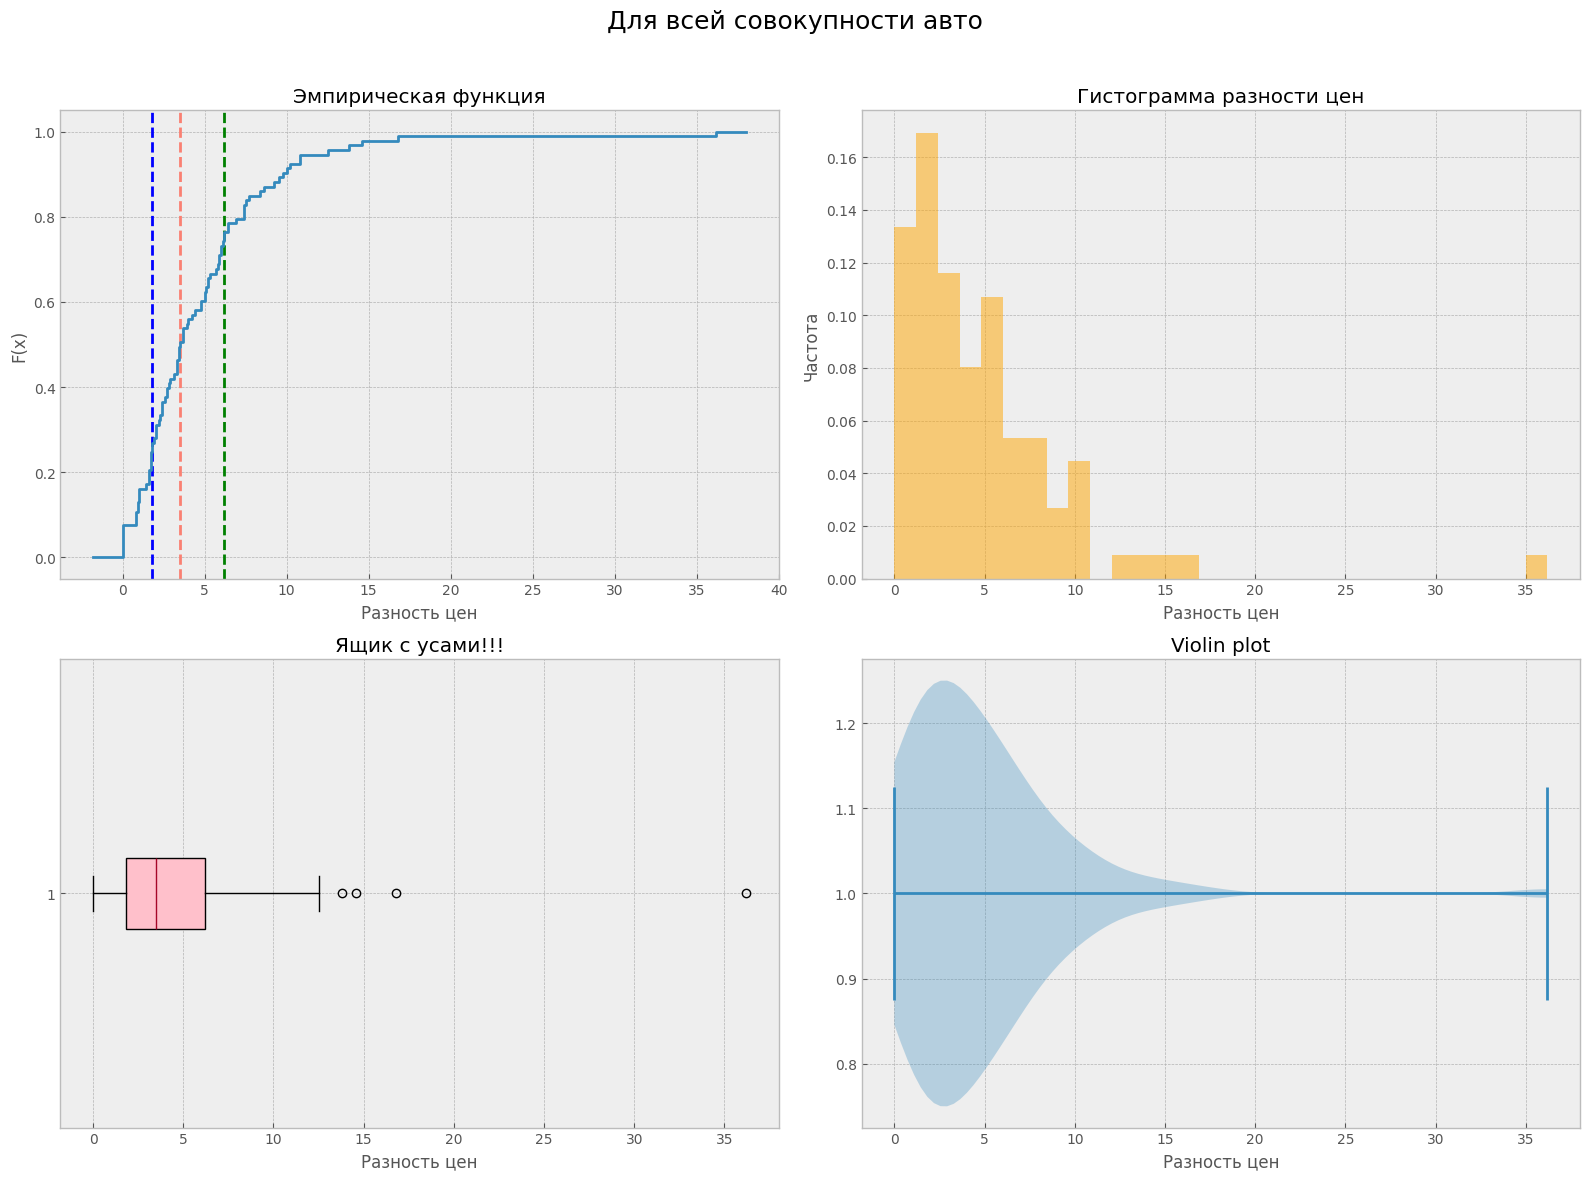

In [83]:
from scipy import stats
import matplotlib.pyplot as plt

def draw(price_diff, title):
    plt.figure(figsize=(16, 12))
    plt.suptitle(title, fontsize=18)
    ecdf = stats.ecdf(price_diff['Diff.Price'])
    plt.subplot(2, 2, 1)
    plt.title("Эмпирическая функция")
    plt.xlabel("Разность цен")
    plt.axvline(price_diff['Diff.Price'].median(), color='salmon', linestyle='--')
    plt.axvline(price_diff['Diff.Price'].quantile(0.25), color='blue', linestyle='--')
    plt.axvline(price_diff['Diff.Price'].quantile(0.75), color='green', linestyle='--')
    plt.ylabel("F(x)")
    ecdf.cdf.plot()

    plt.subplot(2, 2, 2)
    plt.hist(price_diff['Diff.Price'], bins=30, density=True, alpha=0.5, color='orange')
    plt.title("Гистограмма разности цен")
    plt.xlabel("Разность цен")
    plt.ylabel("Частота")

    plt.subplot(2, 2, 3)
    plt.boxplot(price_diff['Diff.Price'], vert=False, patch_artist=True, boxprops=dict(facecolor='pink'))
    plt.title("Ящик с усами!!!")
    plt.xlabel("Разность цен")

    plt.subplot(2, 2, 4)
    plt.violinplot(price_diff['Diff.Price'], vert=False)
    plt.title("Violin plot")
    plt.xlabel("Разность цен")
    plt.tight_layout(rect=[0, 0, 1, 0.96])
draw(price_diff, "Для всей совокупности авто")

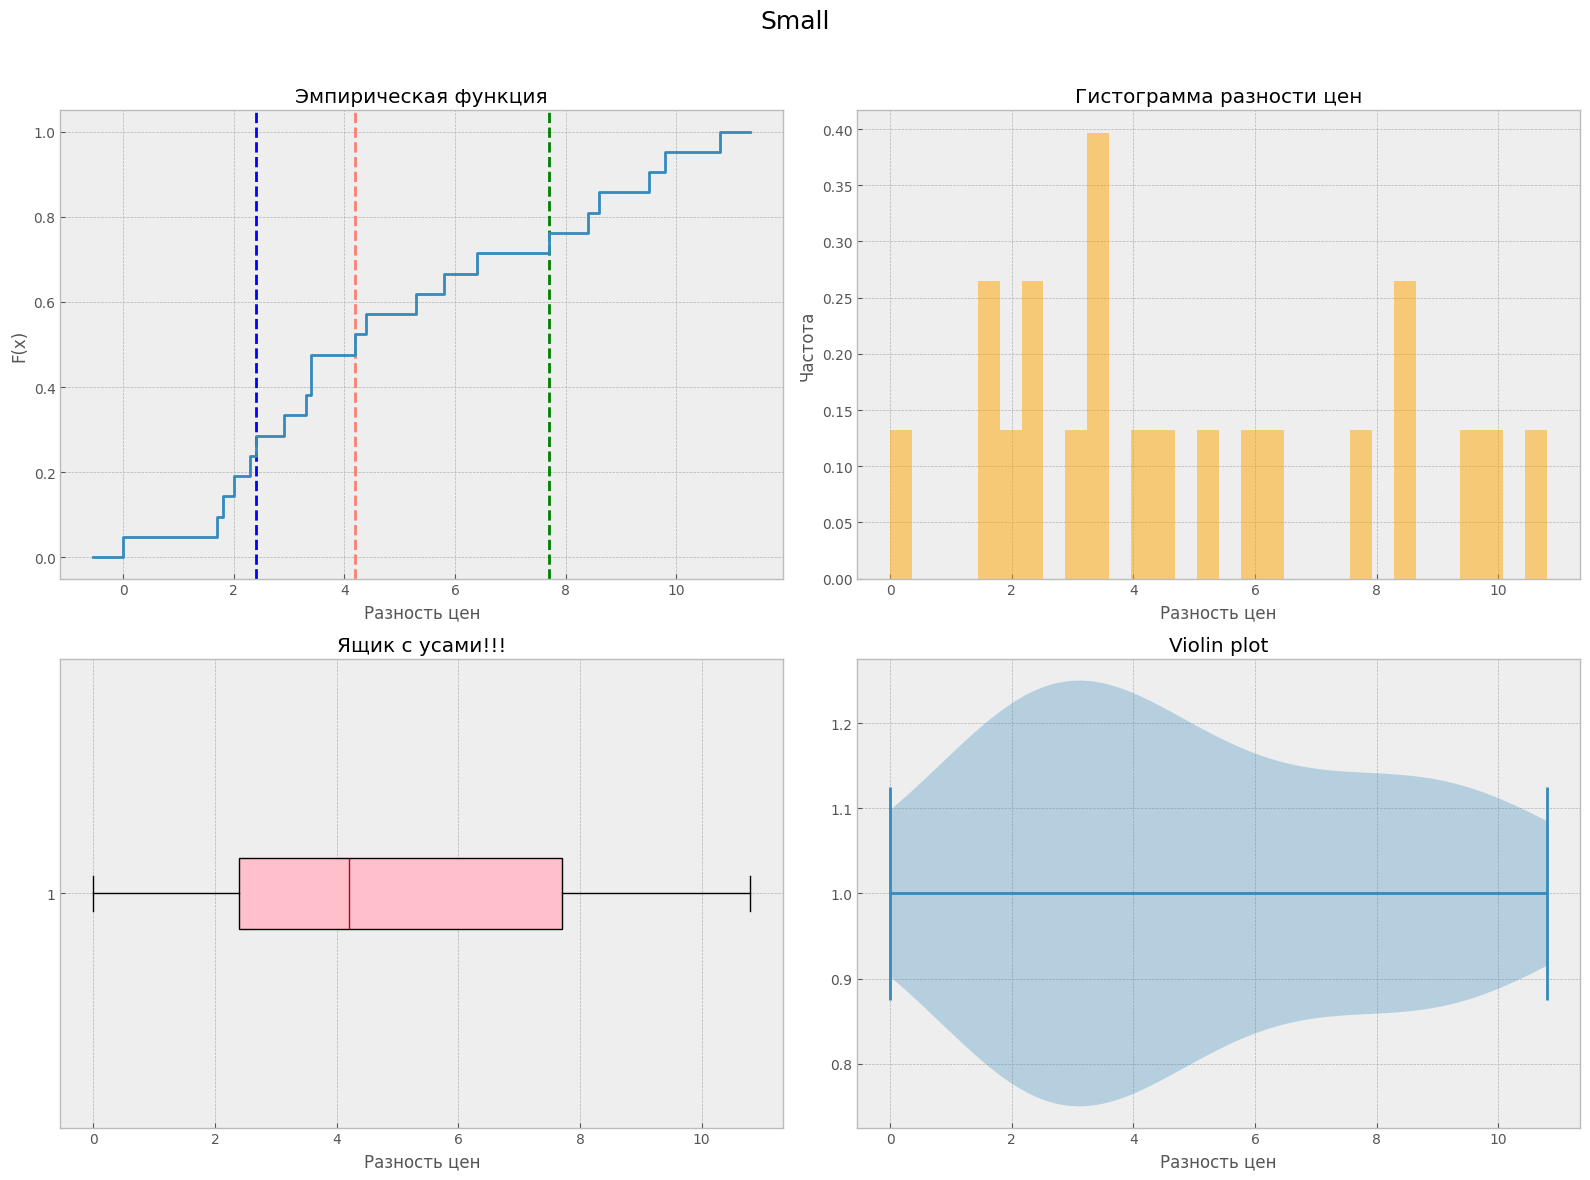

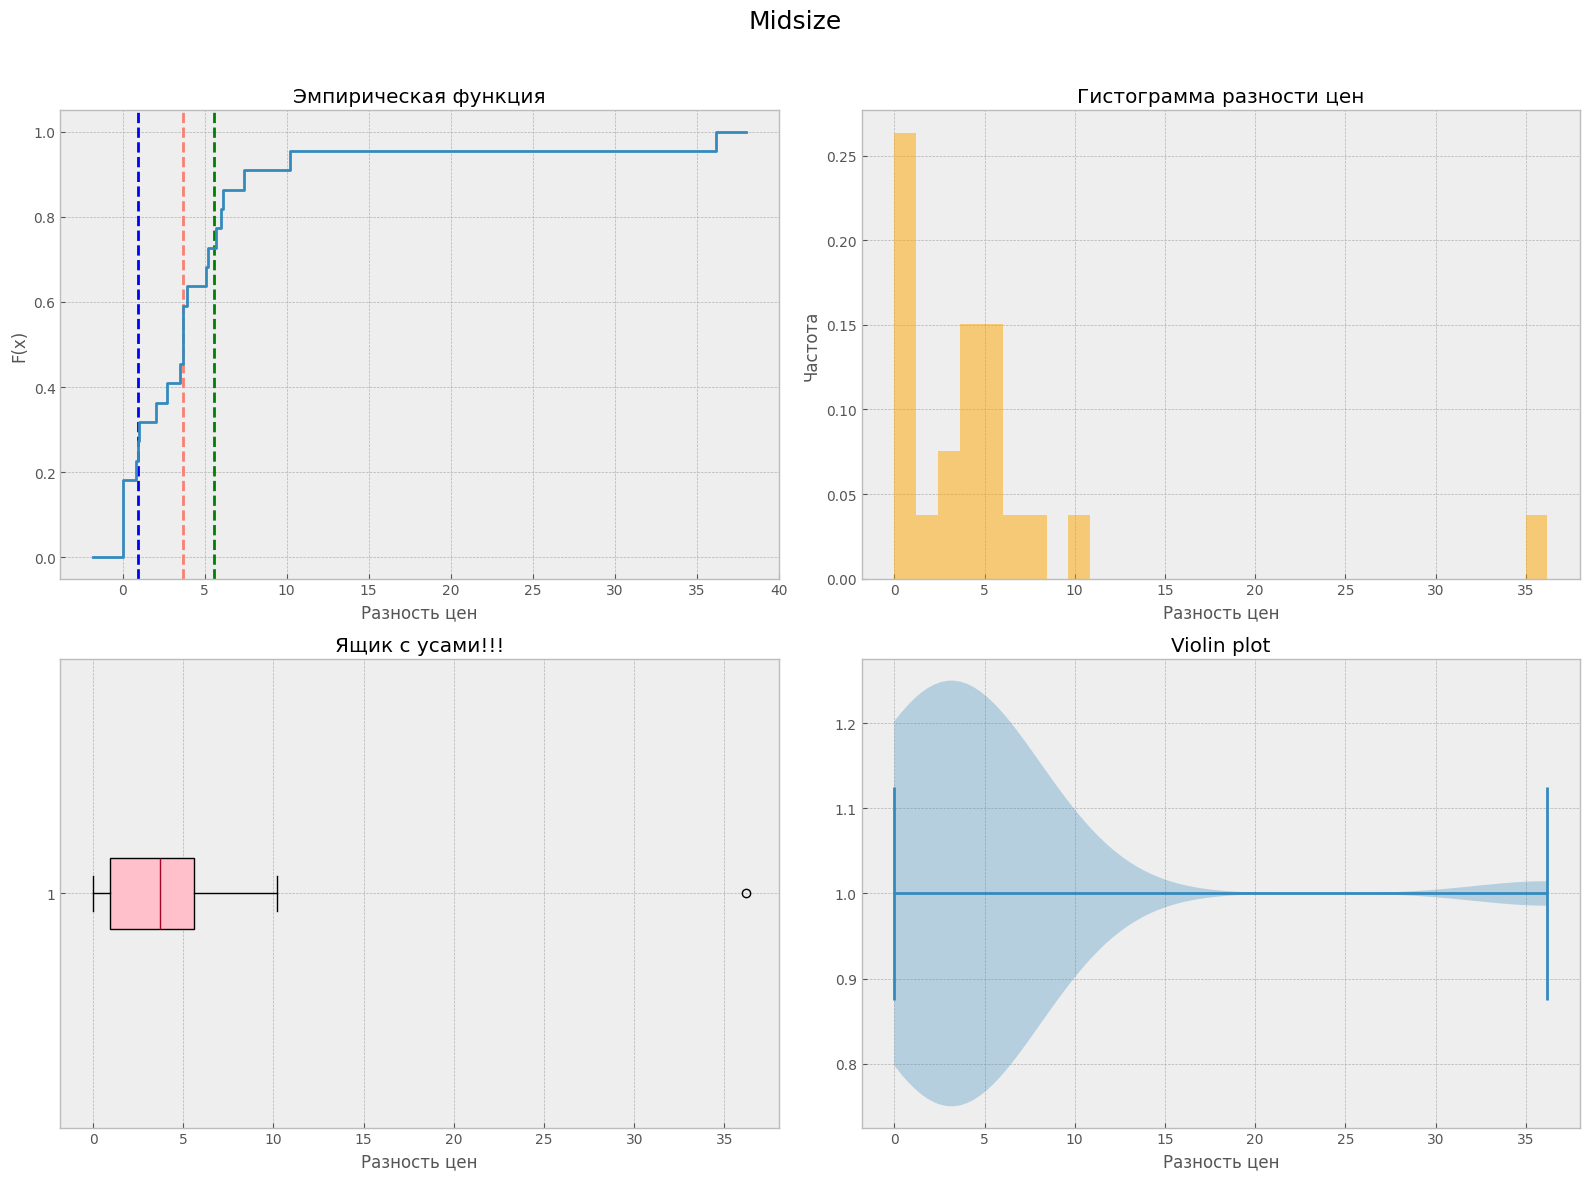

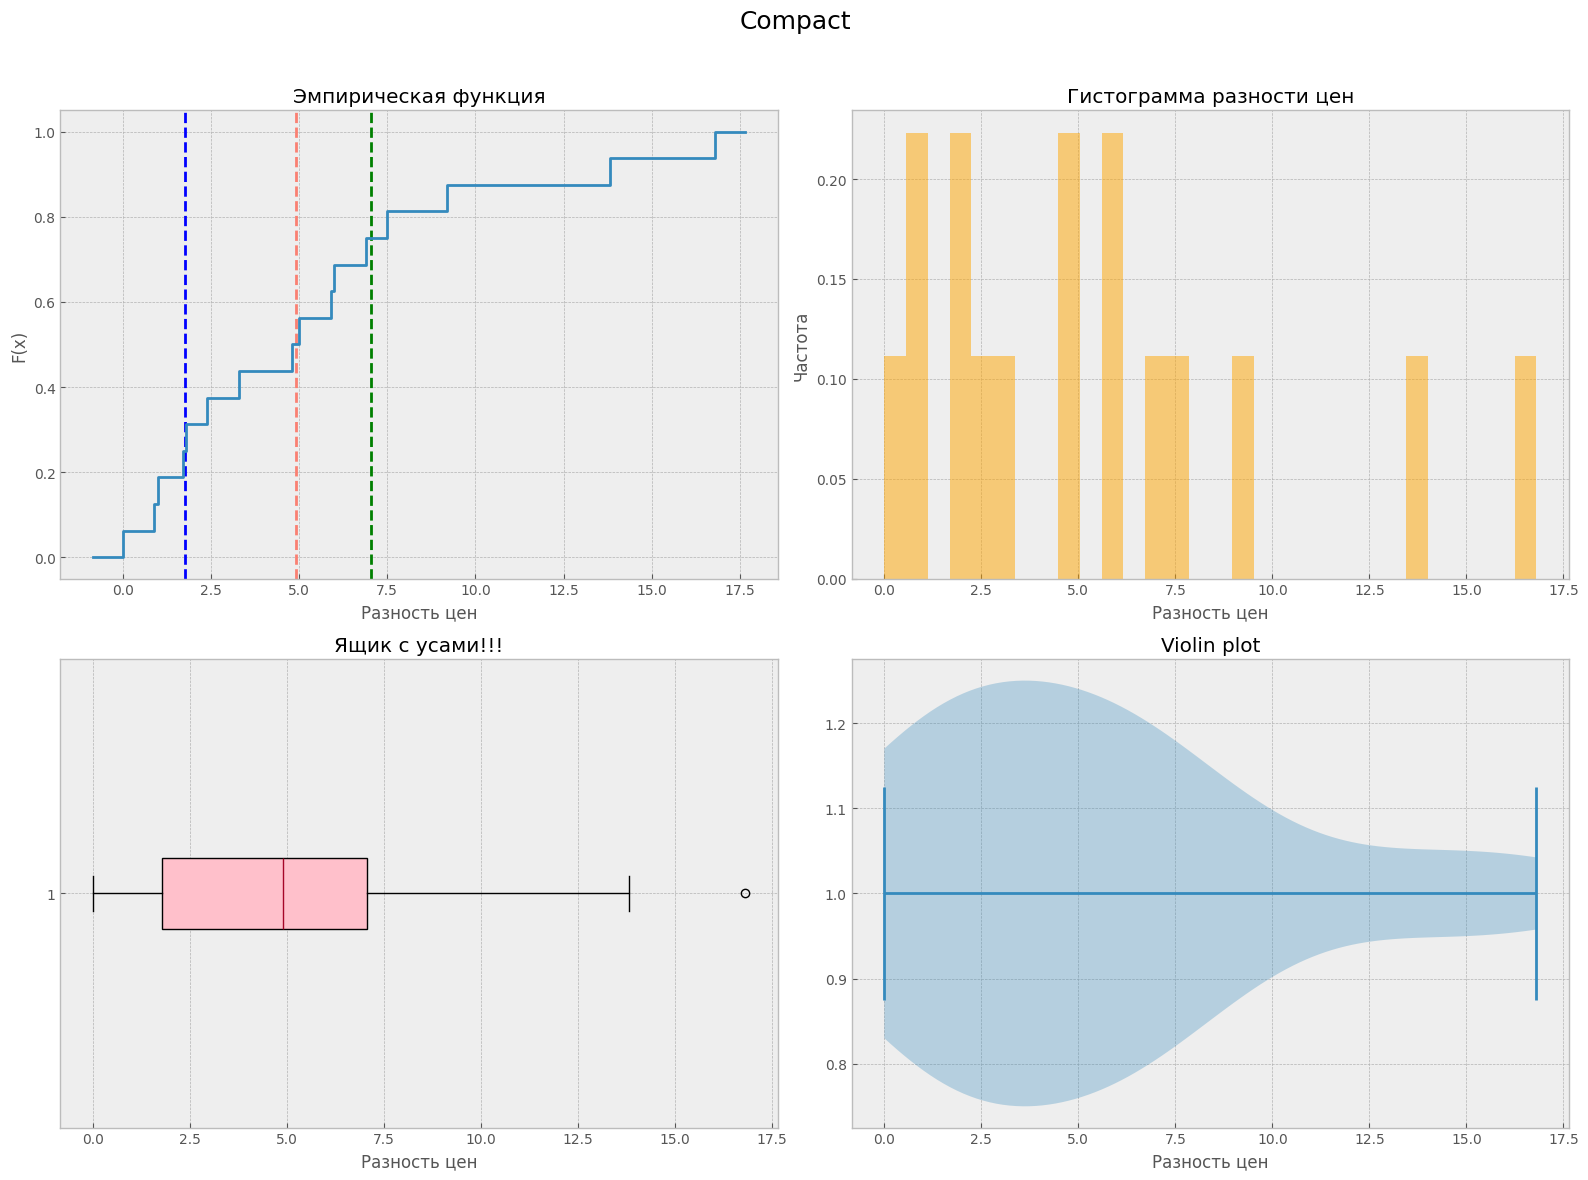

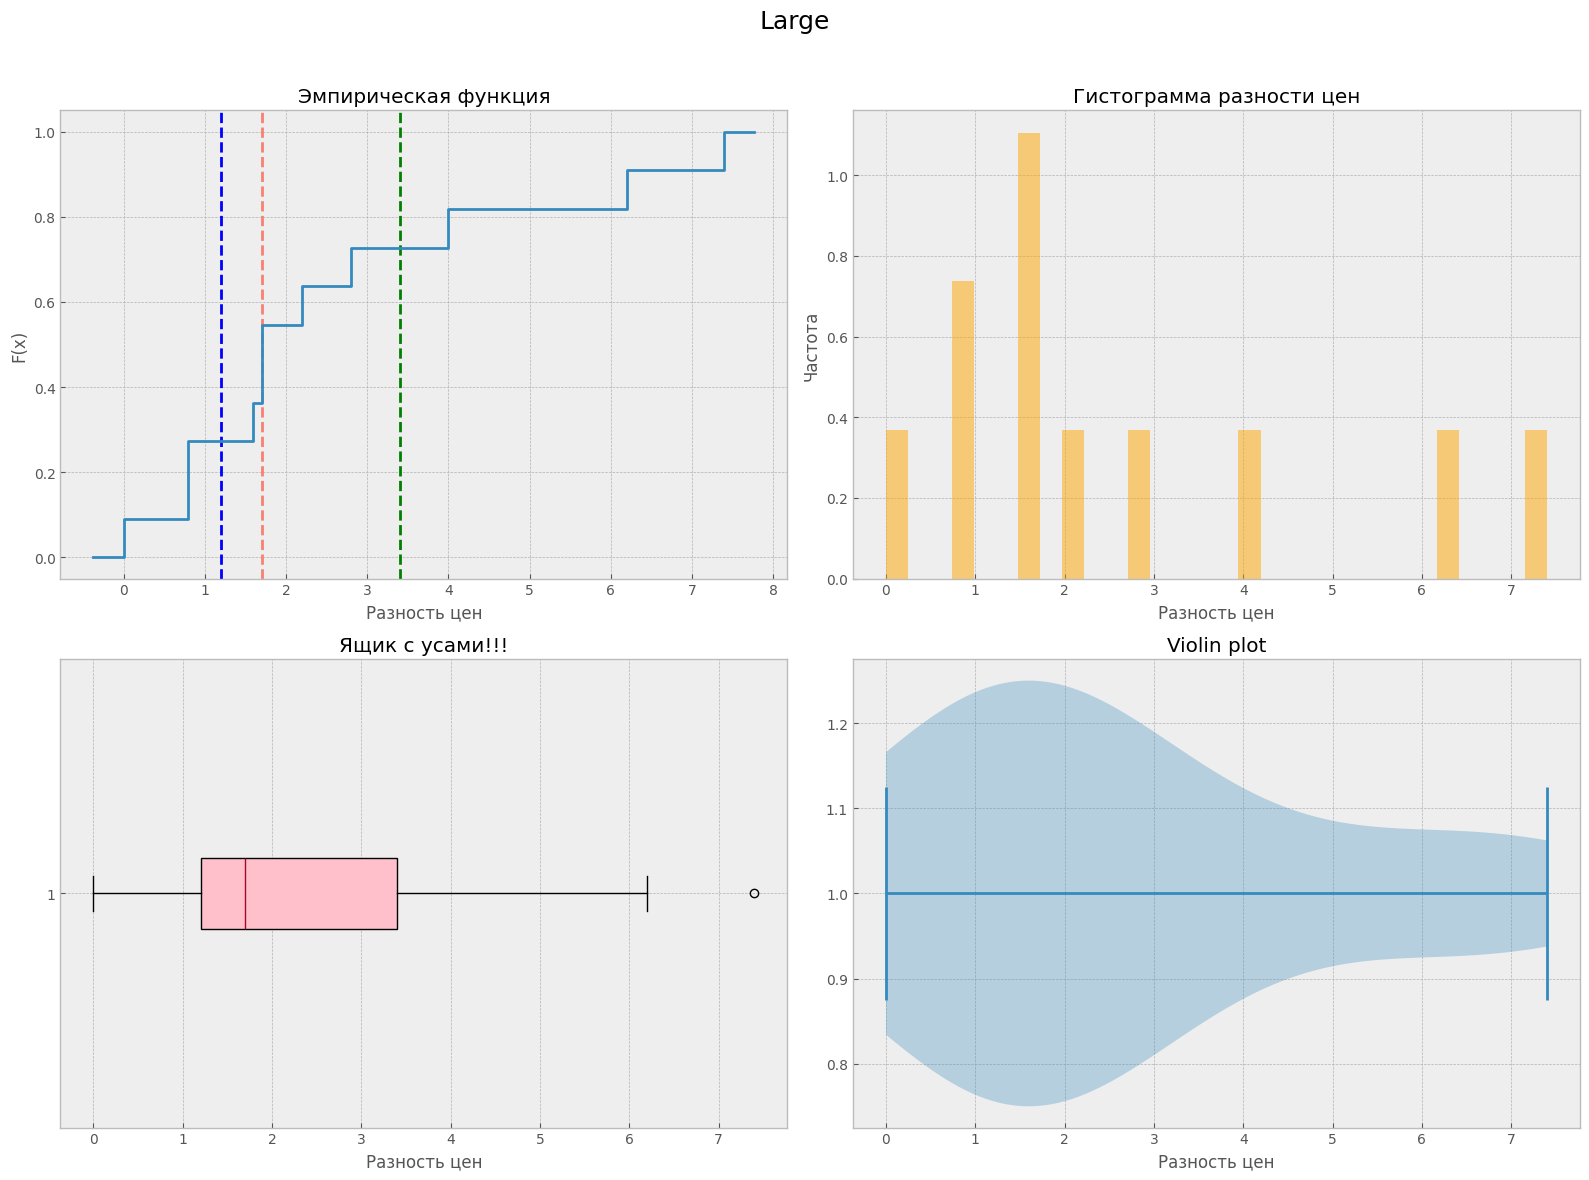

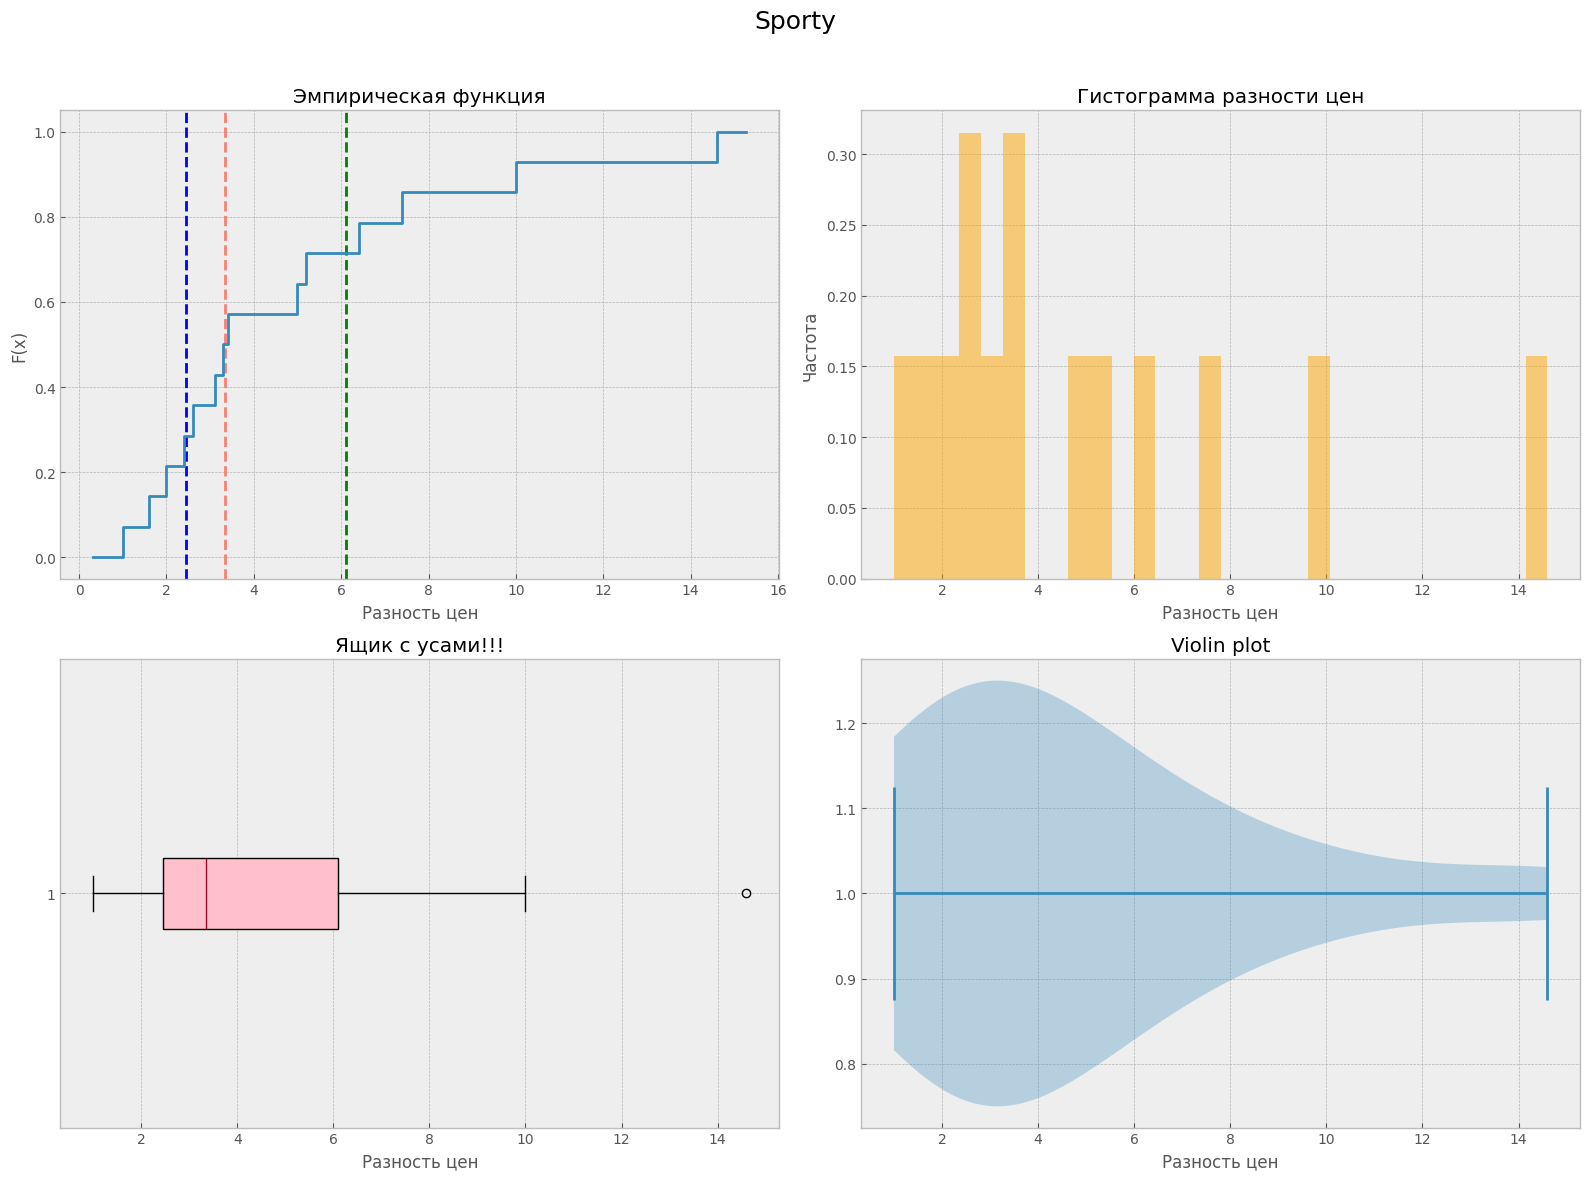

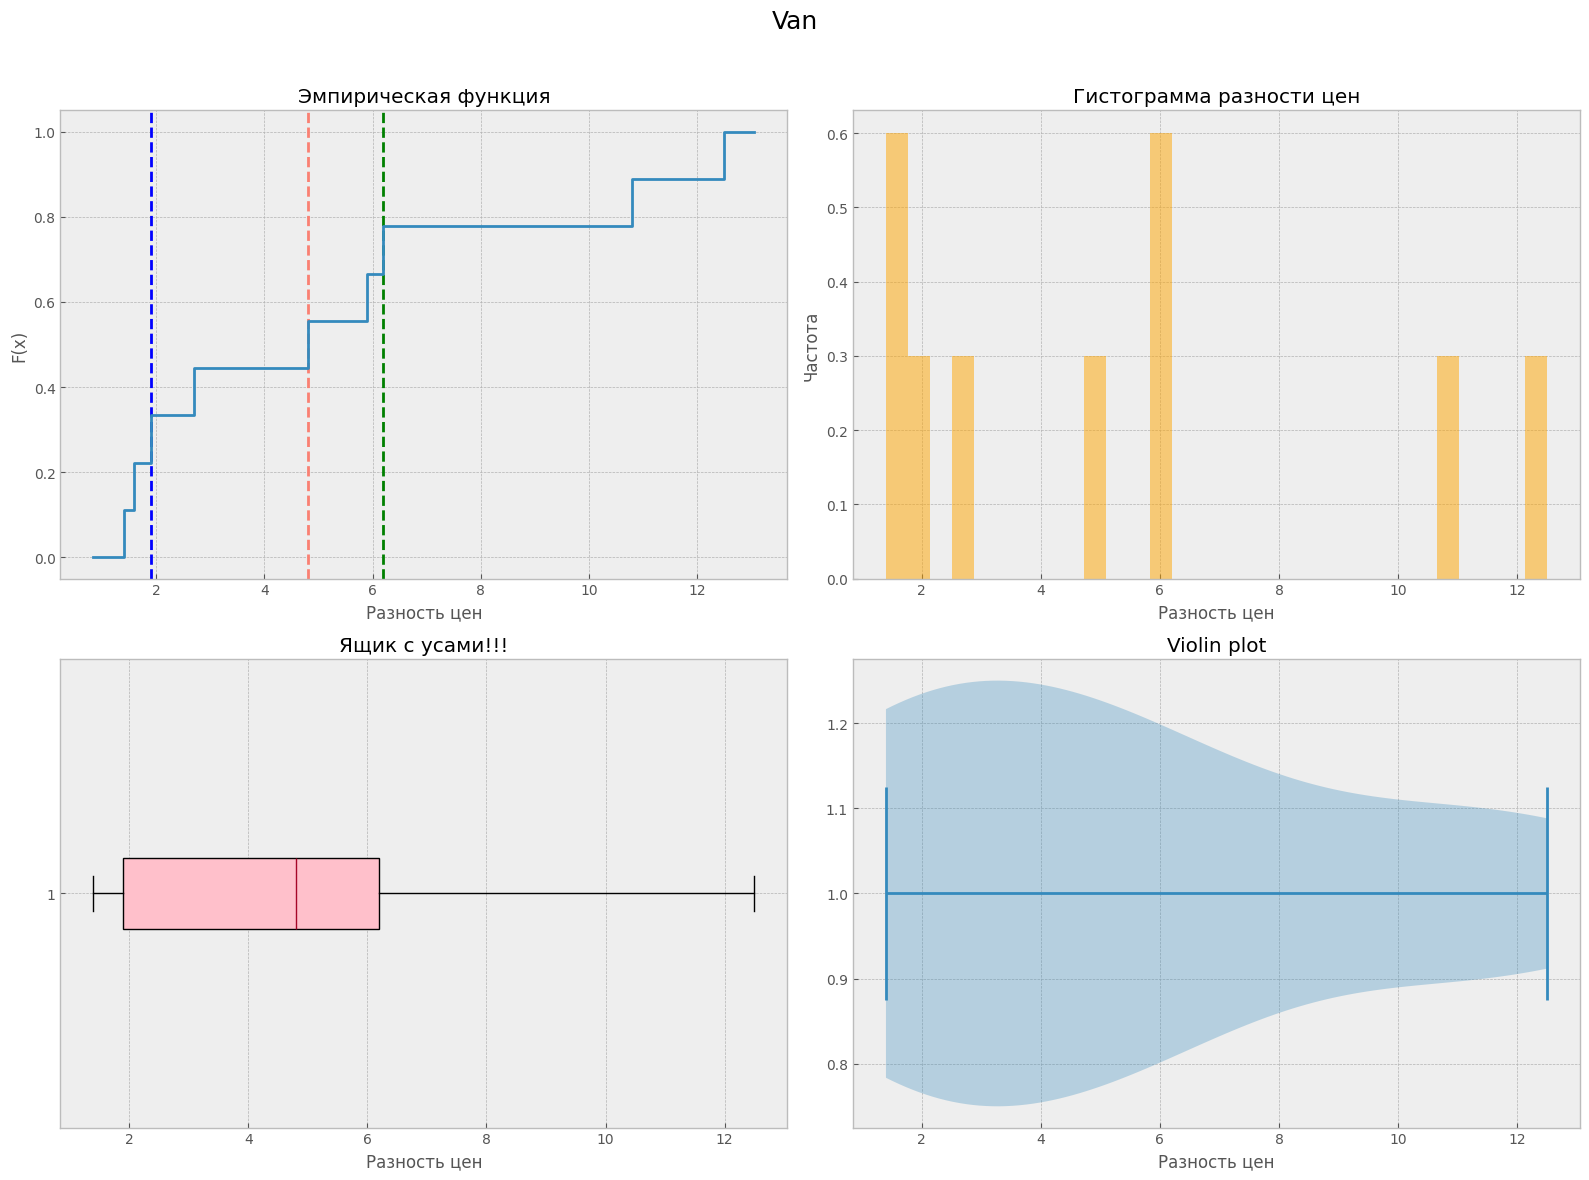

In [82]:

for type in types:
    draw(price_diff[price_diff["Type"] == type], type)